# Otimização com o Algoritmo de Seleção Clonal (CLONALG)

## 1. Introdução

### Função Rastrigin - Exemplo de Otimização Contínua

Neste notebook, aplicamos o ClonAlg à **Função Rastrigin**, um problema clássico de otimização contínua 
usando algoritmos de otimização do pacote AISP.

A função Rastrigin é uma função multimodal não-convexa que possui muitos mínimos locais, 
tornando-a um excelente teste para algoritmos de otimização. A função é definida como:

**f(x) = 10n + Σ[i=1 to n] (x_i² - 10cos(2πx_i))**

Onde:
- **n** é a dimensão do problema
- **x_i** ∈ [-5.12, 5.12] para cada dimensão
- **Mínimo global**: f(0,0) = 0

## 2. Configuração

### Instalação das bibliotecas necessários.

In [ ]:
%pip install matplotlib
%pip install aisp

### Importação das bibliotecas necessárias

In [1]:
# Importando o Algoritmo de Seleção Clonal (CLONALG)
from aisp.csa import Clonalg

# Bibliotecas para manipulação de dados e cálculos numéricos
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

## 3. Definição do problema

In [2]:
# Configuração do problema
problem_size = 2
bounds = {'low': -5.12, 'high': 5.12}

def rastrigin_fitness(x: np.ndarray) -> np.float64:
    x = np.clip(x, bounds['low'], bounds['high'])
    
    n = len(x)
    result = 10 * n
    for i in range(n):
        result += x[i]**2 - 10 * np.cos(2 * np.pi * x[i])
    return np.float64(result)

## 4. Configuração do algoritmo

In [3]:
# Configuração otimizada do ClonAlg para função Rastrigin
clonalg = Clonalg(
    problem_size=problem_size,
    N=50,
    selection_size=15,
    rate_clonal=10,
    rate_hypermutation=0.3,
    n_diversity_injection=15,
    bounds=bounds,
    seed=1234
)

# Registrar a função de fitness
clonalg.register('affinity_function', rastrigin_fitness)


## 5. Execução da otimização

In [4]:
clonalg.optimize(100, 20)

if clonalg.best_cost is not None:
	print('Best cost:', abs(clonalg.best_cost))


┌───────────┬─────────────────────────┬────────────────────┬─────────────────┐
│ Iteration │   Best Affinity (min)   │   Worse Affinity   │   Stagnation    │
├───────────┼─────────────────────────┼────────────────────┼─────────────────┤
│     1     │                 7.153385│           76.021342│        0        │
│     2     │                 2.344533│           33.315827│        0        │
│     3     │                 2.140116│           30.948129│        0        │
│     4     │                 2.140116│           31.998642│        1        │
│     5     │                 0.484366│           56.071764│        0        │
│     6     │                 0.185833│           36.260411│        0        │
│     7     │                 0.185833│           27.861454│        1        │
│     8     │                 0.185833│           29.599095│        2        │
│     9     │                 0.185833│           17.182111│        3        │
│    10     │                 0.185833│           1

## 6. Resultado

In [5]:
print(clonalg.get_report())


            Optimization Summary             
Best cost      : 0.020278270044883584
Best solution  : [ 0.0088594  -0.00487301]
Cost History per Iteration:

┌────────────┬────────────────────────────┐
│ Iteration  │            Cost            │
├────────────┼────────────────────────────┤
│          1 │                   7.153385 │
│          2 │                   2.344533 │
│          3 │                   2.140116 │
│          4 │                   2.140116 │
│          5 │                   0.484366 │
│          6 │                   0.185833 │
│          7 │                   0.185833 │
│          8 │                   0.185833 │
│          9 │                   0.185833 │
│         10 │                   0.185833 │
│         11 │                   0.185833 │
│         12 │                   0.161393 │
│         13 │                   0.161393 │
│         14 │                   0.161393 │
│         15 │                   0.161393 │
│         16 │                   0.161393 │
│      

### 6.1 Evolução do melhor ao longo das gerações

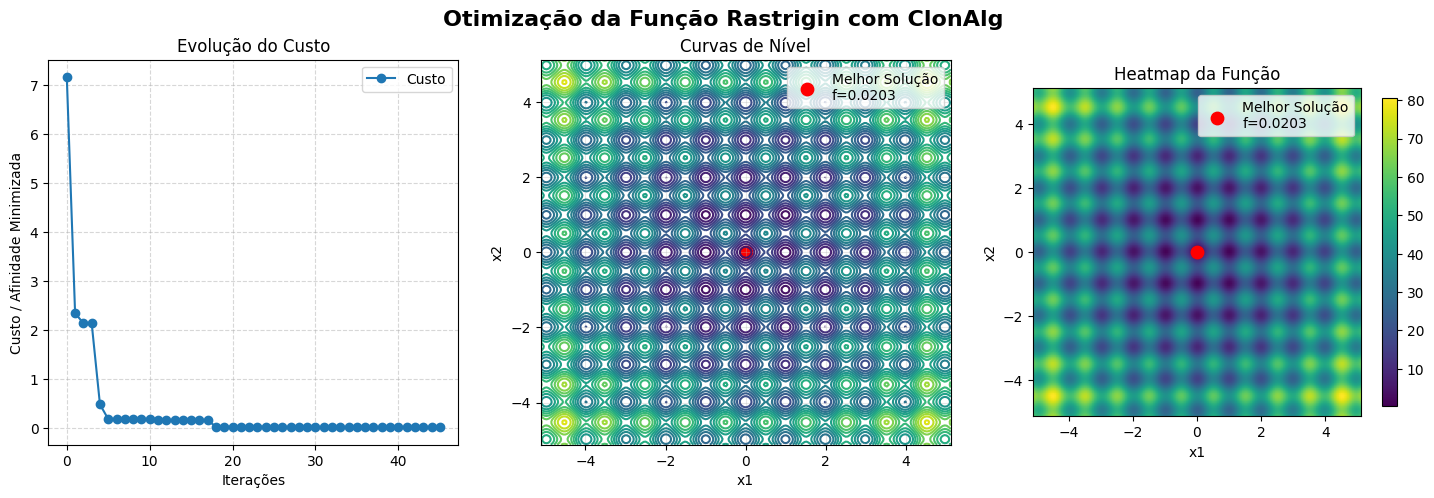

In [6]:
# Preparar dados da função Rastrigin (malha para visualização)
x1 = np.linspace(bounds['low'], bounds['high'], 200)
x2 = np.linspace(bounds['low'], bounds['high'], 200)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rastrigin_fitness(np.array([X[i, j], Y[i, j]]))

# Melhor solução do ClonAlg
best_solution = clonalg.best_solution
best_cost = clonalg.best_cost

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131)
costs = np.array(clonalg.cost_history)

ax1.plot(costs, marker='o', label='Custo')

ax1.set_title('Evolução do Custo', fontsize=12)
ax1.set_xlabel('Iterações')
ax1.set_ylabel('Custo / Afinidade Minimizada')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
if best_solution is not None:
    ax2.scatter(best_solution[0], best_solution[1], color='red', s=80, label=f'Melhor Solução\nf={best_cost:.4f}')
    ax2.legend()
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid(True, alpha=0.3)
ax2.set_title('Curvas de Nível')

ax3 = fig.add_subplot(133)
im = ax3.imshow(Z, extent=(bounds['low'], bounds['high'], bounds['low'], bounds['high']),
                origin='lower', cmap='viridis')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Heatmap da Função')
plt.colorbar(im, ax=ax3, shrink=0.8)

# Marcar melhor solução no heatmap
if best_solution is not None:
    ax3.scatter(best_solution[0], best_solution[1], color='red', s=80, label=f'Melhor Solução\nf={best_cost:.4f}')
    ax3.legend()

fig.suptitle('Otimização da Função Rastrigin com ClonAlg', fontsize=16, fontweight='bold')
plt.show()
